In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [3]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)
df.head()

,Sex,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=7)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((3341, 10), (836, 10), (3341,), (836,))

In [5]:
X_tr = X_tr.astype('float32')
# X_tr.info()
y_tr = y_tr.astype('float32')
X_te = X_te.astype('float32')
y_te = y_te.astype('float32')

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [7]:
X[:5]

array([[0.    , 0.    , 1.    , 0.455 , 0.365 , 0.095 , 0.514 , 0.2245,
        0.101 , 0.15  ],
       [0.    , 0.    , 1.    , 0.35  , 0.265 , 0.09  , 0.2255, 0.0995,
        0.0485, 0.07  ],
       [1.    , 0.    , 0.    , 0.53  , 0.42  , 0.135 , 0.677 , 0.2565,
        0.1415, 0.21  ],
       [0.    , 0.    , 1.    , 0.44  , 0.365 , 0.125 , 0.516 , 0.2155,
        0.114 , 0.155 ],
       [0.    , 1.    , 0.    , 0.33  , 0.255 , 0.08  , 0.205 , 0.0895,
        0.0395, 0.055 ]])

## model

In [8]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Flatten())
model.add(Dense(1))

In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 360us/sample - loss: 108.0055 - mae: 9.8700 - val_loss: 93.4926 - val_mae: 9.1714
Epoch 2/100
2672/2672 [==============================] - 0s 24us/sample - loss: 90.9003 - mae: 9.0031 - val_loss: 77.8259 - val_mae: 8.3176
Epoch 3/100
2672/2672 [==============================] - 0s 26us/sample - loss: 74.8836 - mae: 8.1026 - val_loss: 62.7397 - val_mae: 7.4003
Epoch 4/100
2672/2672 [==============================] - 0s 39us/sample - loss: 59.3049 - mae: 7.1180 - val_loss: 48.0809 - val_mae: 6.3807
Epoch 5/100
2672/2672 [==============================] - 0s 30us/sample - loss: 44.4863 - mae: 6.0311 - val_loss: 34.6546 - val_mae: 5.2722
Epoch 6/100
2672/2672 [==============================] - 0s 37us/sample - loss: 31.4993 - mae: 4.8691 - val_loss: 23.4367 - val_mae: 4.1203
Epoch 7/100
2672/2672 [==============================] - 0s 32us/sample - loss: 21.2503 - mae: 3.7102 - val_los

2672/2672 [==============================] - 0s 26us/sample - loss: 6.6916 - mae: 1.8875 - val_loss: 5.8316 - val_mae: 1.7418
Epoch 60/100
2672/2672 [==============================] - 0s 27us/sample - loss: 6.6767 - mae: 1.8715 - val_loss: 5.8231 - val_mae: 1.7297
Epoch 61/100
2672/2672 [==============================] - 0s 23us/sample - loss: 6.6626 - mae: 1.8664 - val_loss: 5.8131 - val_mae: 1.7338
Epoch 62/100
2672/2672 [==============================] - 0s 24us/sample - loss: 6.6508 - mae: 1.8761 - val_loss: 5.8079 - val_mae: 1.7401
Epoch 63/100
2672/2672 [==============================] - 0s 29us/sample - loss: 6.6384 - mae: 1.8808 - val_loss: 5.7995 - val_mae: 1.7394
Epoch 64/100
2672/2672 [==============================] - 0s 31us/sample - loss: 6.6259 - mae: 1.8728 - val_loss: 5.7880 - val_mae: 1.7326
Epoch 65/100
2672/2672 [==============================] - 0s 29us/sample - loss: 6.6144 - mae: 1.8607 - val_loss: 5.7798 - val_mae: 1.7265
Epoch 66/100
2672/2672 [================

In [12]:
y_pred = model.predict(X_te)

In [13]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
score

[6.656052112579346, 1.780649]

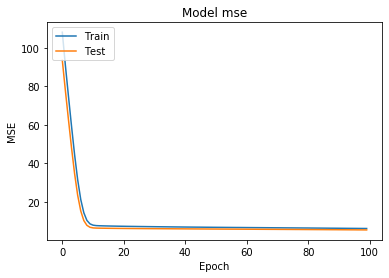

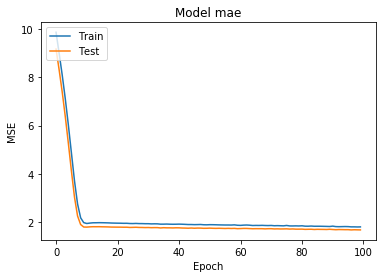

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 2 increase nodes

In [17]:
model = Sequential()
model.add(Dense(256, input_shape=(10,)))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [20]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 210us/sample - loss: 91.0387 - mae: 8.9823 - val_loss: 64.0518 - val_mae: 7.4836
Epoch 2/100
2672/2672 [==============================] - 0s 46us/sample - loss: 50.0047 - mae: 6.4057 - val_loss: 29.0311 - val_mae: 4.7277
Epoch 3/100
2672/2672 [==============================] - 0s 44us/sample - loss: 19.7355 - mae: 3.4799 - val_loss: 9.4431 - val_mae: 2.1273
Epoch 4/100
2672/2672 [==============================] - 0s 46us/sample - loss: 8.8165 - mae: 2.0613 - val_loss: 6.7077 - val_mae: 1.8888
Epoch 5/100
2672/2672 [==============================] - 0s 45us/sample - loss: 8.0491 - mae: 2.1054 - val_loss: 6.6403 - val_mae: 1.8824
Epoch 6/100
2672/2672 [==============================] - 0s 43us/sample - loss: 7.8511 - mae: 2.0281 - val_loss: 6.5347 - val_mae: 1.8265
Epoch 7/100
2672/2672 [==============================] - 0s 34us/sample - loss: 7.7418 - mae: 1.9980 - val_loss: 6.4672

2672/2672 [==============================] - 0s 26us/sample - loss: 5.4105 - mae: 1.6727 - val_loss: 4.8093 - val_mae: 1.5900
Epoch 60/100
2672/2672 [==============================] - 0s 24us/sample - loss: 5.3904 - mae: 1.6774 - val_loss: 4.7881 - val_mae: 1.5889
Epoch 61/100
2672/2672 [==============================] - 0s 23us/sample - loss: 5.3535 - mae: 1.6700 - val_loss: 4.7759 - val_mae: 1.5470
Epoch 62/100
2672/2672 [==============================] - 0s 24us/sample - loss: 5.3357 - mae: 1.6545 - val_loss: 4.7439 - val_mae: 1.5595
Epoch 63/100
2672/2672 [==============================] - 0s 21us/sample - loss: 5.2920 - mae: 1.6532 - val_loss: 4.7149 - val_mae: 1.5760
Epoch 64/100
2672/2672 [==============================] - 0s 22us/sample - loss: 5.2726 - mae: 1.6566 - val_loss: 4.6952 - val_mae: 1.5434
Epoch 65/100
2672/2672 [==============================] - 0s 24us/sample - loss: 5.2463 - mae: 1.6473 - val_loss: 4.6982 - val_mae: 1.5834
Epoch 66/100
2672/2672 [================

In [21]:
y_pred = model.predict(X_te)

In [22]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [23]:
score

[5.1363652995898965, 1.6098971]

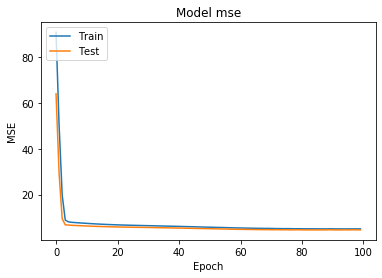

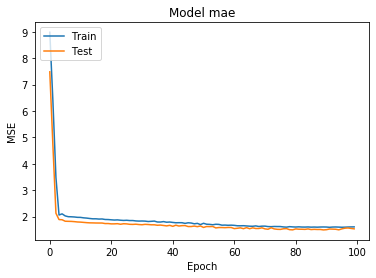

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()